In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from folium import plugins

In [2]:
df_rodent = pd.read_csv("Rodent_Inspection.csv")
print("Rodent_Inspection.csv has {0} rows and {1} columns.".format(df_rodent.shape[0],df_rodent.shape[1]))

Rodent_Inspection.csv has 2065411 rows and 20 columns.


In [3]:
df_rodent.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11611986,PC6523781,1,2028800113,2,2880,113,NaN,SEDGWICK AVENUE,10453.0,0.0,0.0,NaN,NaN,Bronx,11/24/2009 10:31:42 AM,Passed,11/25/2009 08:28:08 AM,NaN
1,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
2,Initial,11814495,PC6154122,1,1006380019,1,638,19,720,WEST 11 STREET,NaN,981787.0,207342.0,0.0,0.0,Manhattan,04/16/2012 03:39:54 PM,Passed,04/23/2012 11:19:22 AM,"(0.0, 0.0)"
3,Initial,12239212,PC7528187,1,4012720034,4,1272,34,3552B,73 STREET,NaN,1013891.0,212281.0,0.0,0.0,Queens,01/30/2017 10:30:29 AM,Rat Activity,02/02/2017 02:53:50 PM,"(0.0, 0.0)"
4,Initial,13265710,PC7744893,1,3011260085,3,1126,85,PACIFIC,STREET,11238.0,NaN,NaN,NaN,NaN,Brooklyn,07/30/2021 01:35:51 PM,Passed,08/02/2021 11:52:03 AM,NaN


In [4]:
df_rodent.describe()

,JOB_TICKET_OR_WORK_ORDER_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE
count,2.065411e+06,2.065411e+06,2.065411e+06,2.065411e+06,2.065411e+06,2.065411e+06,2.053590e+06,1.902349e+06,1.902349e+06,2.057877e+06,2.057877e+06
mean,1.076033e+07,1.923357e+00,2.237594e+09,2.211832e+00,2.576166e+03,1.936897e+02,1.058257e+04,1.019711e+06,2.336117e+05,4.053885e+01,-7.352852e+01
std,3.540197e+06,3.670500e+00,1.081793e+09,1.073925e+00,1.997697e+03,1.032260e+03,6.936777e+02,1.924675e+06,1.882154e+06,3.007642e+00,5.452719e+00
min,2.372269e+06,1.000000e+00,1.000000e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.890702e+01,-7.946610e+01
25%,1.151459e+07,1.000000e+00,1.019220e+09,1.000000e+00,1.395000e+03,1.700000e+01,1.003200e+04,9.950140e+05,1.935570e+05,4.069586e+01,-7.396092e+01
50%,1.206254e+07,1.000000e+00,2.031730e+09,2.000000e+00,2.173000e+03,3.600000e+01,1.045800e+04,1.003011e+06,2.178680e+05,4.076092e+01,-7.393273e+01
75%,1.262306e+07,2.000000e+00,3.020170e+09,3.000000e+00,3.218000e+03,6.000000e+01,1.121500e+04,1.012302e+06,2.426940e+05,4.083204e+01,-7.389955e+01
max,1.334852e+07,1.750000e+02,9.053610e+09,9.000000e+00,2.700000e+04,9.999000e+03,1.234500e+04,3.191389e+08,3.743923e+08,4.091286e+01,0.000000e+00


In [5]:
df_rodent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065411 entries, 0 to 2065410
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   INSPECTION_TYPE              object 
 1   JOB_TICKET_OR_WORK_ORDER_ID  int64  
 2   JOB_ID                       object 
 3   JOB_PROGRESS                 int64  
 4   BBL                          int64  
 5   BORO_CODE                    int64  
 6   BLOCK                        int64  
 7   LOT                          int64  
 8   HOUSE_NUMBER                 object 
 9   STREET_NAME                  object 
 10  ZIP_CODE                     float64
 11  X_COORD                      float64
 12  Y_COORD                      float64
 13  LATITUDE                     float64
 14  LONGITUDE                    float64
 15  BOROUGH                      object 
 16  INSPECTION_DATE              object 
 17  RESULT                       object 
 18  APPROVED_DATE                object 
 19  

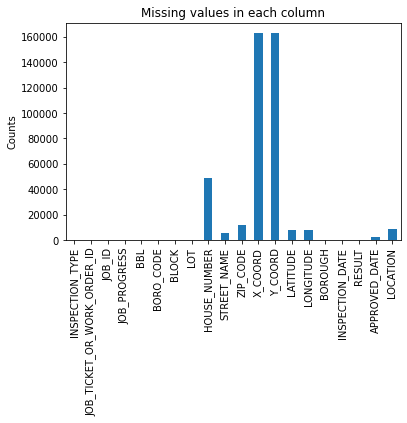

In [6]:
# find number of missing value in the column
df_rodent.isna().sum(axis=0).plot.bar()
plt.title('Missing values in each column')
plt.ylabel("Counts")
# plt.show()
plt.savefig("plots/Missing_values.png")

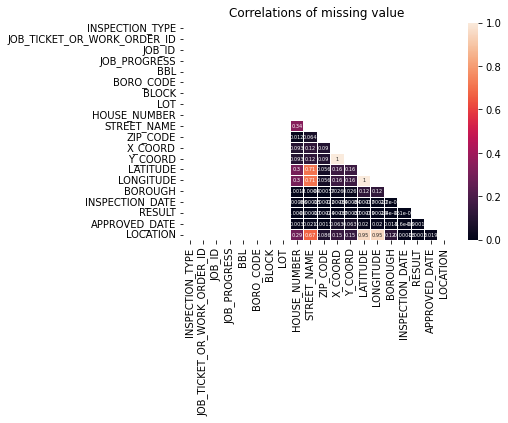

In [7]:
# find relations between columns
missing_corr = df_rodent.isna().corr()
mask = np.triu(np.ones_like(missing_corr, dtype=bool))
sns.heatmap(missing_corr, linewidth=0.5, mask=mask, annot = True, annot_kws = {'fontsize':5})
plt.title("Correlations of missing value")
# plt.show()
plt.savefig('plots/Correlations_missing_value.png')

From the plot above, we know that when 'X_COORD' is missing, 'Y_COORD' also missed, so as 'Latitude' and 'Longitude'. And when 'Location' is missing, it is highly likely that 'Latitude' and 'Longitude' are also missing. When 'Street_name' is missing, it is also likely that 'Location', 'Latitude' and 'Longitude' are missing.

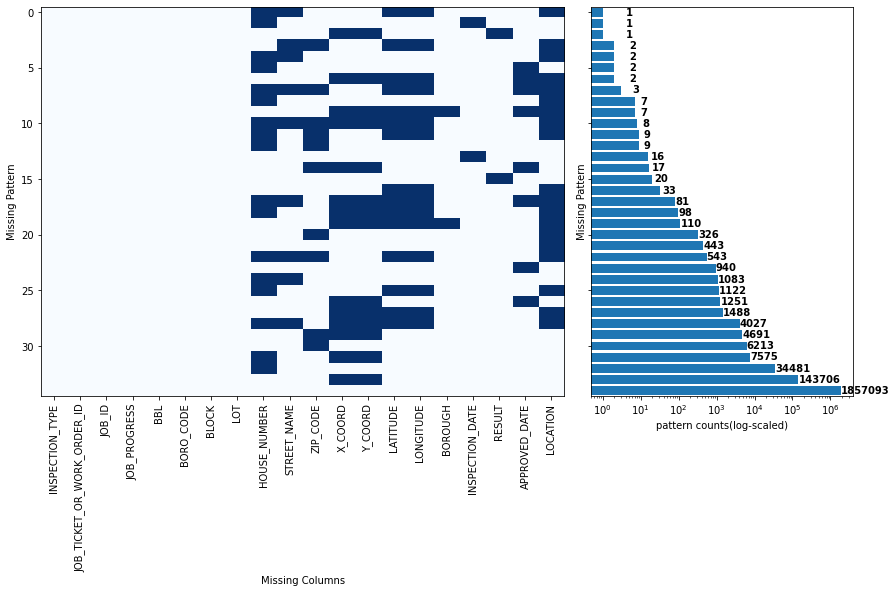

In [8]:
# missing value pattern
missing_patterns = df_rodent.isna().groupby(list(df_rodent.isna().columns),as_index=False).size()
missing_patterns = missing_patterns.sort_values(by='size').reset_index(drop=True)
fig, ax = plt.subplots(1,2, figsize=(12,6), gridspec_kw={'width_ratios': [2,1]}, sharey = True)
fig.tight_layout()

ax[0].imshow(missing_patterns.iloc[:,0:-1], aspect='auto', cmap = 'Blues')
ax[0].set_xlabel('Missing Columns')
ax[0].set_ylabel("Missing Pattern")
ax[0].set_xticks(ticks = np.arange(20), labels = missing_patterns.columns[0:-1], rotation = 90)


ax[1].barh(missing_patterns['size'].index, missing_patterns['size'])
ax[1].set_xscale('log')
for i, v in enumerate(missing_patterns['size']):
    ax[1].text(v + 3, i + .25, str(v), color='black', fontweight='bold')

ax[1].set_xlabel('pattern counts(log-scaled)')
ax[1].set_ylabel("Missing Pattern")
plt.savefig("plots/Missing_Pattern.png")

In [9]:
df_rodent.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11611986,PC6523781,1,2028800113,2,2880,113,NaN,SEDGWICK AVENUE,10453.0,0.0,0.0,NaN,NaN,Bronx,11/24/2009 10:31:42 AM,Passed,11/25/2009 08:28:08 AM,NaN
1,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
2,Initial,11814495,PC6154122,1,1006380019,1,638,19,720,WEST 11 STREET,NaN,981787.0,207342.0,0.0,0.0,Manhattan,04/16/2012 03:39:54 PM,Passed,04/23/2012 11:19:22 AM,"(0.0, 0.0)"
3,Initial,12239212,PC7528187,1,4012720034,4,1272,34,3552B,73 STREET,NaN,1013891.0,212281.0,0.0,0.0,Queens,01/30/2017 10:30:29 AM,Rat Activity,02/02/2017 02:53:50 PM,"(0.0, 0.0)"
4,Initial,13265710,PC7744893,1,3011260085,3,1126,85,PACIFIC,STREET,11238.0,NaN,NaN,NaN,NaN,Brooklyn,07/30/2021 01:35:51 PM,Passed,08/02/2021 11:52:03 AM,NaN


In [10]:
# find categorical columns
for col in df_rodent:
    cat = df_rodent[col].unique()
    if len(cat) < 100:
        print(col, df_rodent[col].unique())

INSPECTION_TYPE ['Initial' 'Compliance' 'BAIT' 'CLEAN_UPS' 'STOPPAGE']
BORO_CODE [2 1 4 3 5 9]
BOROUGH ['Bronx' 'Manhattan' 'Queens' 'Brooklyn' 'Staten Island' nan]
RESULT ['Passed' 'Rat Activity' 'Bait applied' 'Cleanup done' 'Stoppage done'
 'Monitoring visit' 'Failed for Other R' nan]


In [11]:
# filter rows without LONGITUDE and LATITUDE
# input NaN values with zero for columns: X_COORD,Y_COORD,LATITUDE,LONGITUDE
df_rodent['LATITUDE'] = df_rodent['LATITUDE'].fillna(0)
df_rodent['LONGITUDE'] = df_rodent['LONGITUDE'].fillna(0)
df_rodent['X_COORD'] = df_rodent['X_COORD'].fillna(0)
df_rodent['Y_COORD'] = df_rodent['Y_COORD'].fillna(0)
df_rodent['LOCATION'] = df_rodent['LOCATION'].fillna('(0.0, 0.0)')
df_rodent[df_rodent['LOCATION'] == '(0.0, 0.0)']['LOCATION'] = 0

df_rodent.head()

/var/folders/_y/qzymmsdj5jj6nb7_yhb63h0r0000gn/T/ipykernel_22606/2478946688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rodent[df_rodent['LOCATION'] == '(0.0, 0.0)']['LOCATION'] = 0


,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11611986,PC6523781,1,2028800113,2,2880,113,NaN,SEDGWICK AVENUE,10453.0,0.0,0.0,0.0,0.0,Bronx,11/24/2009 10:31:42 AM,Passed,11/25/2009 08:28:08 AM,"(0.0, 0.0)"
1,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
2,Initial,11814495,PC6154122,1,1006380019,1,638,19,720,WEST 11 STREET,NaN,981787.0,207342.0,0.0,0.0,Manhattan,04/16/2012 03:39:54 PM,Passed,04/23/2012 11:19:22 AM,"(0.0, 0.0)"
3,Initial,12239212,PC7528187,1,4012720034,4,1272,34,3552B,73 STREET,NaN,1013891.0,212281.0,0.0,0.0,Queens,01/30/2017 10:30:29 AM,Rat Activity,02/02/2017 02:53:50 PM,"(0.0, 0.0)"
4,Initial,13265710,PC7744893,1,3011260085,3,1126,85,PACIFIC,STREET,11238.0,0.0,0.0,0.0,0.0,Brooklyn,07/30/2021 01:35:51 PM,Passed,08/02/2021 11:52:03 AM,"(0.0, 0.0)"


In [12]:
# find rows where columns ['X_COORD','Y_COORD','LATITUDE','LONGITUDE', 'LOCATION'] are all null/zero
rows_to_filtered = (df_rodent[['X_COORD','Y_COORD','LATITUDE','LONGITUDE', 'LOCATION']] == 0 ).all(axis = 1)
df_filtered = df_rodent[-rows_to_filtered]

print(df_filtered.shape)
df_filtered.head()

(2065411, 20)


,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11611986,PC6523781,1,2028800113,2,2880,113,NaN,SEDGWICK AVENUE,10453.0,0.0,0.0,0.0,0.0,Bronx,11/24/2009 10:31:42 AM,Passed,11/25/2009 08:28:08 AM,"(0.0, 0.0)"
1,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
2,Initial,11814495,PC6154122,1,1006380019,1,638,19,720,WEST 11 STREET,NaN,981787.0,207342.0,0.0,0.0,Manhattan,04/16/2012 03:39:54 PM,Passed,04/23/2012 11:19:22 AM,"(0.0, 0.0)"
3,Initial,12239212,PC7528187,1,4012720034,4,1272,34,3552B,73 STREET,NaN,1013891.0,212281.0,0.0,0.0,Queens,01/30/2017 10:30:29 AM,Rat Activity,02/02/2017 02:53:50 PM,"(0.0, 0.0)"
4,Initial,13265710,PC7744893,1,3011260085,3,1126,85,PACIFIC,STREET,11238.0,0.0,0.0,0.0,0.0,Brooklyn,07/30/2021 01:35:51 PM,Passed,08/02/2021 11:52:03 AM,"(0.0, 0.0)"


In [13]:
df_filtered[ -df_filtered['APPROVED_DATE'].isna() ]

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11611986,PC6523781,1,2028800113,2,2880,113,NaN,SEDGWICK AVENUE,10453.0,0.0,0.0,0.000000,0.000000,Bronx,11/24/2009 10:31:42 AM,Passed,11/25/2009 08:28:08 AM,"(0.0, 0.0)"
1,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.000000,0.000000,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
2,Initial,11814495,PC6154122,1,1006380019,1,638,19,720,WEST 11 STREET,NaN,981787.0,207342.0,0.000000,0.000000,Manhattan,04/16/2012 03:39:54 PM,Passed,04/23/2012 11:19:22 AM,"(0.0, 0.0)"
3,Initial,12239212,PC7528187,1,4012720034,4,1272,34,3552B,73 STREET,NaN,1013891.0,212281.0,0.000000,0.000000,Queens,01/30/2017 10:30:29 AM,Rat Activity,02/02/2017 02:53:50 PM,"(0.0, 0.0)"
4,Initial,13265710,PC7744893,1,3011260085,3,1126,85,PACIFIC,STREET,11238.0,0.0,0.0,0.000000,0.000000,Brooklyn,07/30/2021 01:35:51 PM,Passed,08/02/2021 11:52:03 AM,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065406,Initial,12077865,PC6237979,1,1018720056,1,1872,56,234,WEST 101 STREET,10025.0,992493.0,229982.0,40.797979,-73.969824,Manhattan,05/21/2015 11:33:06 AM,Passed,05/29/2015 09:33:52 AM,"(40.797978962057, -73.969823514211)"
2065407,Initial,11592132,PC7287081,1,3014500014,3,1450,14,NaN,DEAN STREET,11233.0,0.0,0.0,40.674332,-73.907673,Brooklyn,10/22/2018 03:20:48 PM,Failed for Other R,10/23/2018 11:57:25 AM,"(40.6743321190373, -73.9076733823261)"
2065408,Compliance,12741039,PC6553418,2,2025170001,2,2517,1,75,WEST 168 STREET,10452.0,1005313.0,244859.0,40.838229,-73.923886,Bronx,02/17/2010 01:20:08 PM,Passed,02/22/2010 03:51:10 PM,"(40.838228583738, -73.923885933689)"
2065409,BAIT,2463771,PC7151393,1,3024370038,3,2437,38,337,SOUTH 4 STREET,11211.0,996920.0,197581.0,40.708717,-73.954214,Brooklyn,10/26/2012 10:06:14 AM,Bait applied,10/29/2012 08:04:29 AM,"(40.708716941804, -73.954213597843)"


In [14]:
# datetime column conversion
import datetime as dt 
df_filtered = df_filtered[ - df_filtered['INSPECTION_DATE'].isna() ]
df_filtered = df_filtered[ - df_filtered['APPROVED_DATE'].isna() ]
print(df_filtered.shape)

# convert datetime object
df_filtered['INSPECTION_DATE'] = [dt.datetime.strptime(str(date_string), '%m/%d/%Y %I:%M:%S %p') for date_string in df_filtered['INSPECTION_DATE'].values ]
df_filtered['APPROVED_DATE'] = [dt.datetime.strptime(str(date_string), '%m/%d/%Y %I:%M:%S %p') for date_string in df_filtered['APPROVED_DATE'].values ]

(2063091, 20)


In [15]:
df_filtered.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11611986,PC6523781,1,2028800113,2,2880,113,NaN,SEDGWICK AVENUE,10453.0,0.0,0.0,0.0,0.0,Bronx,2009-11-24 10:31:42,Passed,2009-11-25 08:28:08,"(0.0, 0.0)"
1,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,2017-09-12 14:45:42,Passed,2017-09-14 14:41:03,"(0.0, 0.0)"
2,Initial,11814495,PC6154122,1,1006380019,1,638,19,720,WEST 11 STREET,NaN,981787.0,207342.0,0.0,0.0,Manhattan,2012-04-16 15:39:54,Passed,2012-04-23 11:19:22,"(0.0, 0.0)"
3,Initial,12239212,PC7528187,1,4012720034,4,1272,34,3552B,73 STREET,NaN,1013891.0,212281.0,0.0,0.0,Queens,2017-01-30 10:30:29,Rat Activity,2017-02-02 14:53:50,"(0.0, 0.0)"
4,Initial,13265710,PC7744893,1,3011260085,3,1126,85,PACIFIC,STREET,11238.0,0.0,0.0,0.0,0.0,Brooklyn,2021-07-30 13:35:51,Passed,2021-08-02 11:52:03,"(0.0, 0.0)"


In [16]:
# Drop rows without result, which is the label
df_filtered = df_filtered[-df_filtered['RESULT'].isna()]
df_filtered.drop(columns=['LOCATION','X_COORD','Y_COORD'], inplace=True)
df_filtered = df_filtered[(df_filtered.LATITUDE != 0) & (df_filtered.LONGITUDE != 0)]
# write cleaned data to csv
df_filtered.to_csv('Rodent_Inspection_Cleaned.csv')
print(df_filtered.shape)

(2063070, 20)


Plot bar charts for categorical features

INSPECTION_TYPE ['Initial' 'Compliance' 'BAIT' 'CLEAN_UPS' 'STOPPAGE']

BORO_CODE [2 1 4 3 5 9]

BOROUGH ['Bronx' 'Manhattan' 'Queens' 'Brooklyn' 'Staten Island' nan]

RESULT ['Passed' 'Rat Activity' 'Bait applied' 'Cleanup done' 'Stoppage done' 'Monitoring visit' 'Failed for Other R' nan]

# Inspection Type
+ Initial Inspection - Inspection conducted in response to a 311 complaint, or a proactive inspection conducted through our neighborhood indexing program.
+ Compliance Inspection - If a property fails its initial inspection, the Health Department will conduct a follow up (Compliance) inspection.
+ Baiting - Application of rodenticide, or monitoring visit by a Health Department Pest Control Professional.
+ Clean Up - The removal of garbage and clutter from a property by the Health Department.

Initial       1438718
BAIT           312880
Compliance     290481
CLEAN_UPS        1591
STOPPAGE          722
Name: INSPECTION_TYPE, dtype: int64


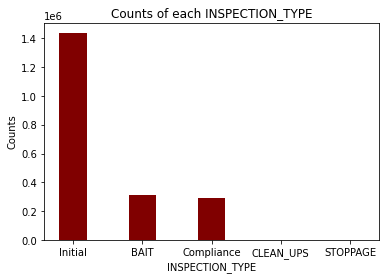

In [36]:
# bar plots
print(df_filtered['INSPECTION_TYPE'].value_counts())
plt.bar(df_filtered['INSPECTION_TYPE'].value_counts().index, df_filtered['INSPECTION_TYPE'].value_counts().values, color ='maroon',
        width = 0.4)
 
plt.xlabel("INSPECTION_TYPE")
plt.ylabel("Counts")
plt.title("Counts of each INSPECTION_TYPE")
plt.savefig("plots/Count_InspectionType.png")
# plt.show()

1    654356
2    605582
3    546769
4    184256
5     53429
Name: BORO_CODE, dtype: int64


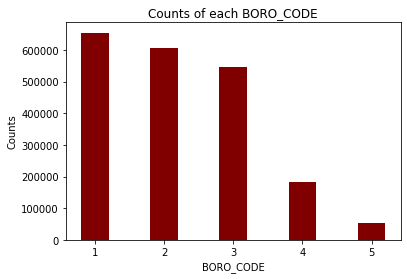

In [34]:
print(df_filtered['BORO_CODE'].value_counts())
plt.bar(df_filtered['BORO_CODE'].value_counts().index, df_filtered['BORO_CODE'].value_counts().values, color ='maroon',
        width = 0.4)
 
plt.xlabel("BORO_CODE")
plt.ylabel("Counts")
plt.title("Counts of each BORO_CODE")
# plt.show()
plt.savefig("plots/Count_BORO_CODE.png")

Manhattan        654356
Bronx            605582
Brooklyn         546769
Queens           184256
Staten Island     53429
Name: BOROUGH, dtype: int64


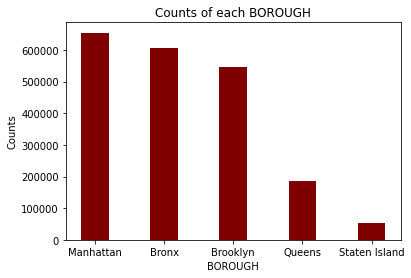

In [35]:
print(df_filtered['BOROUGH'].value_counts())
plt.bar(df_filtered['BOROUGH'].value_counts().index, df_filtered['BOROUGH'].value_counts().values, color ='maroon',
        width = 0.4)
 
plt.xlabel("BOROUGH")
plt.ylabel("Counts")
plt.title("Counts of each BOROUGH")
# plt.show()
plt.savefig("plots/Count_BOROUGH.png")

{"Manhattan":1, "Bronx":2, "Brooklyn":3, "Queens":4, "Staten Island":5}

BORO_CODE and BOROUGH represent exact same information and without losses. However, since the feature is geographical not ordinal, labeling them as number may not be the best option. We decided to perform target encoder or one-hot encoder on this feature if needed. Moreover, this feature may be redundant for training because the information is including in coordinates, but it is useful for visualization and giving insights.

# Inspection Result
+ Active Rat Signs (ARS) - ARS include any of six different signs: 1) fresh tracks, 2) fresh droppings, 3) active burrows, 4) active runways and rub marks, 5) fresh gnawing marks, and 6) live rats.
+ Problem Conditions - Problem conditions include garbage (poor containerization of food waste resulting in the feeding of rats), harborage (clutter and dense vegetation promoting the nesting of rats), and mice."

Passed                1253660
Rat Activity           278581
Bait applied           275276
Failed for Other R     196958
Monitoring visit        37604
Cleanup done             1591
Stoppage done             722
Name: RESULT, dtype: int64


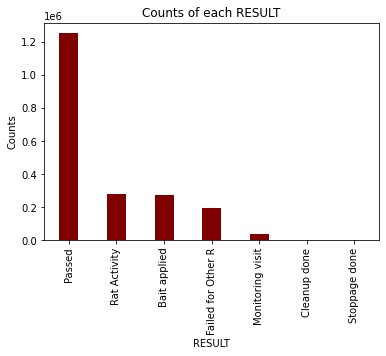

In [37]:
print(df_filtered['RESULT'].value_counts())
plt.bar(df_filtered['RESULT'].value_counts().index, df_filtered['RESULT'].value_counts().values, color ='maroon',
        width = 0.4)
 
plt.xlabel("RESULT")
plt.ylabel("Counts")
plt.xticks(rotation = 90)
plt.title("Counts of each RESULT")
# plt.show()
plt.savefig("plots/Count_RESULT.png")

In [21]:
# check if LATITUDE and LONGITUDE are 0, LOCATION is also 0, 
all(df_filtered[(df_filtered.LATITUDE == 0) & (df_filtered.LONGITUDE == 0)]['LOCATION'] == 0)
# True: Drop location column and use coordinates

False

# BBL
BBL = BORO_CODE + BLOCK + LOT

In [24]:
# verify it is always 10 digits.
all([len(str(i)) == 10 for i in df_filtered['BBL'].values]) # True

True

In [25]:
# Verify JOB_TICKET_OR_WORK_ORDER_ID is unique ID
df_filtered['JOB_TICKET_OR_WORK_ORDER_ID'].unique().shape[0] == df_filtered.shape[0] # True

True

'JOB_ID' identified each job, but it is not the unique id of this dataset. 'JOB_PROGRESS' is an indicator of the progress made in the job. Jobs may involve multiple inspections or other actions, and the progress indicator shows the order in which they took place.

In [26]:
# Exploring 'INSPECTION_DATE'
yr = [i.year for i in df_filtered['INSPECTION_DATE']]
mn_2021 = [i.month for i in df_filtered['INSPECTION_DATE'] if i.year == 2021]
# Date difference between 'INSPECTION_DATE' and 'APPROVED_DATE'
date_diff = df_filtered['APPROVED_DATE'] - df_filtered['INSPECTION_DATE']


<BarContainer object of 31 artists>

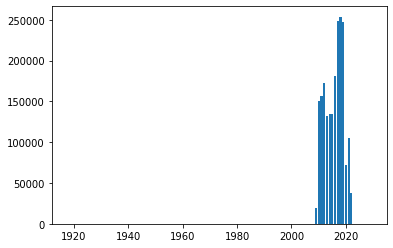

In [27]:
plt.bar(pd.Series(yr).value_counts().index, pd.Series(yr).value_counts().values)

<BarContainer object of 12 artists>

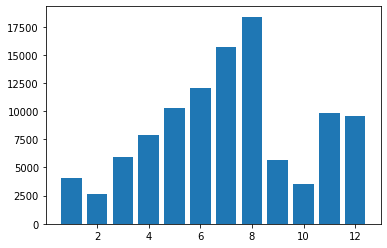

In [28]:
plt.bar(pd.Series(mn_2021).value_counts().index, pd.Series(mn_2021).value_counts().values)

In [29]:
date_diff = [ i.round('D').days for i in date_diff]

{'whiskers': [<matplotlib.lines.Line2D at 0x156d35a60>,
 'caps': [<matplotlib.lines.Line2D at 0x15b15f310>,
 'boxes': [<matplotlib.lines.Line2D at 0x156d35910>],
 'medians': [<matplotlib.lines.Line2D at 0x15b15fe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b15fa30>],
 'means': []}

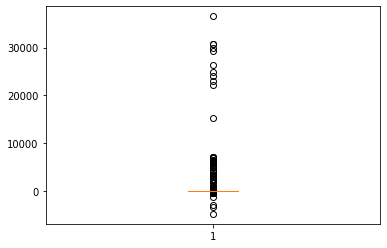

In [30]:
plt.boxplot(date_diff)

In [33]:

failed_inspections = df_filtered[df_filtered["RESULT"] != "Passed"].sample(300)

inspection_station_locations = failed_inspections[["LATITUDE", "LONGITUDE"]].sample(1)
map = folium.Map(location=[inspection_station_locations.LATITUDE.mean(), 
                           inspection_station_locations.LONGITUDE.mean()], 
                           zoom_start=14, 
                           control_scale=True)

plugins.HeatMap(list(zip(failed_inspections["LATITUDE"], failed_inspections["LONGITUDE"])), radius=15, min_opacity=1).add_to(map)
map